# Barplot for denoising stats
Can only compare within dada2 for now

In [14]:
files = ['~/data/stats/2stats.tsv','~/data/stats/11stats.tsv']

In [11]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

In [12]:
def load_df(filenames):
    stats = []
    for filename in filenames:
        stats.append( (pd.read_csv(filename, sep="\t"), filename) )
    return stats

In [13]:
def clean( lst ):
    # lst is a tuple of (dataframe, nameofdf) and cols is the name of the columns
    sums = pd.DataFrame(data=None, columns=['Input','Filtered','Denoised','Merged','Non-chimeric']) #, columns=cols) #sums is the df with the sums for each denoising steps
    filenames = []
    for t in lst:
        df = t[0].drop(t[0].index[0])
        df.iloc[:,1:6] = df.iloc[:,1:6].apply(pd.to_numeric)
        sums = sums.append(df.iloc[:,1:6].sum(), ignore_index=True)
        filenames.append(t[1])
    index = pd.DataFrame({'id':filenames})
    sums = sums.join(index)
    sums = sums.set_index("id")
    
    rc('font', weight='bold') # y-axis in bold
    r = [0,1] # The position of the bars on the x-axis
    names = files #of groups
    barWidth = 1
    Step=['Input','Filtered','Denoised','Merged','Non-chimeric']

    plt.bar(r, sums.loc[:,'input'], color='darkorange', edgecolor='white', width=barWidth)
    plt.bar(r, sums.loc[:,'filtered'], color='orange', edgecolor='white', width=barWidth)
    plt.bar(r, sums.loc[:,'denoised'], color='sandybrown', edgecolor='white', width=barWidth)
    plt.bar(r, sums.loc[:,'merged'], color='navajowhite', edgecolor='white', width=barWidth)
    plt.bar(r, sums.loc[:,'non-chimeric'], color='blanchedalmond', edgecolor='white', width=barWidth)
    
    # Custom axis
    plt.xticks(r, names, fontweight='bold')
    plt.xlabel("Method")
    plt.ylabel("Sequencing depth")
    
    # Show graphic
    plt.legend(Step,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    return plt.show()

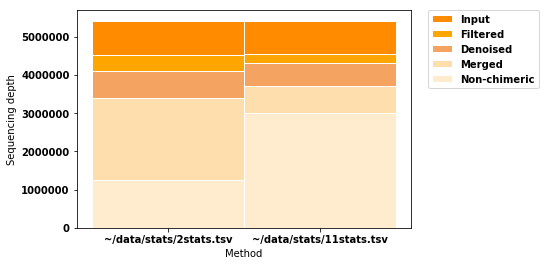

In [15]:
stats = load_df(files)
cleaned = clean(stats)
cleaned